Student Name: EURICO DE JESUS SOARES DE BRITO
Student No: 22191577

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [6]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
df.head(10)

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   
5    0.666667         1.033169    1.610445              0.75               1   
6    0.000000         0.561265    0.849455              0.75               1   
7    1.000000         0.690066    1.198493              0.75               0   
8    0.666667         0.844289    1.244199              0.75               1   
9    0.333333         1.677956    1.836790              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   
5            1           0            1            0                  1   
6            1           0            1            0                  0   
7            1           0            1            0                  0   
8            1           0            1            0                  0   
9            1           0            1            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   
5                  0                       0                        0   
6                  0                       1                        0   
7                  0                       0                        1   
8                  0                       0                        0   
9                  0                       0                        1   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305  
5                    1              1     1.235628  
6                    1              1     0.544004  
7                    0              0     0.800567  
8                    1              1     0.799496  
9                    0              0     2.037433

The data above seems to be scaled already and encoded already, however the ApplicantIncome, LoanAmount and TotalIncome seem to be using values other than between 1 and 0.

In [7]:
print(data)

[[0.         1.08452321 1.05814015 ... 1.         1.         0.84108572]
 [0.33333333 0.92588297 1.04731899 ... 0.         0.         0.87171097]
 [0.         0.68385824 0.63592037 ... 1.         1.         0.38518942]
 ...
 [0.33333333 1.31371906 1.56610955 ... 1.         1.         1.11607471]
 [0.66666667 1.267616   1.32567579 ... 1.         1.         1.04225648]
 [0.         0.92588297 1.07415544 ... 0.         0.         0.66352286]]


In [8]:
#MaxAbsScaler is useful if your data has missing values.
datacopy1 = data
datacopy1 = preprocessing.maxabs_scale(datacopy1)
print(datacopy1)

[[0.         0.32301705 0.42993822 ... 1.         1.         0.26223673]
 [0.33333333 0.27576725 0.42554142 ... 0.         0.         0.27178518]
 [0.         0.20368201 0.25838399 ... 1.         1.         0.12009574]
 ...
 [0.33333333 0.3912813  0.63633381 ... 1.         1.         0.34797379]
 [0.66666667 0.37754986 0.53864197 ... 1.         1.         0.32495847]
 [0.         0.27576725 0.43644547 ... 0.         0.         0.20687554]]


In [10]:
#StandardScaler
datacopy2 = data
sc = preprocessing.StandardScaler()
datacopy2 = sc.fit_transform(datacopy2)
print(datacopy2)

[[-0.73780632  0.40757955 -0.05342334 ...  1.42814704  0.67451931
  -0.05050043]
 [ 0.25346957  0.02255809 -0.08539434 ... -0.70020801 -1.48253724
   0.02110079]
 [-0.73780632 -0.56483834 -1.30086785 ...  1.42814704  0.67451931
  -1.11637665]
 ...
 [ 0.25346957  0.96384015  1.44736764 ...  1.42814704  0.67451931
   0.59241822]
 [ 1.24474546  0.85194757  0.7370083  ...  1.42814704  0.67451931
   0.41983269]
 [-0.73780632  0.02255809 -0.00610631 ... -0.70020801 -1.48253724
  -0.46563876]]


In [12]:
#RobustScaler
datacopy3 = data
rsc = preprocessing.RobustScaler()
datacopy3 = rsc.fit_transform(datacopy3)
print(datacopy3)

[[ 0.          0.64731827  0.03128378 ...  1.          0.
   0.13043443]
 [ 1.          0.26579301  0.         ...  0.         -1.
   0.2002892 ]
 [ 0.         -0.31626954 -1.18934673 ...  1.          0.
  -0.90944369]
 ...
 [ 1.          1.19852774  1.49981504 ...  1.          0.
   0.75767146]
 [ 2.          1.0876512   0.80472497 ...  1.          0.
   0.58929552]
 [ 0.          0.26579301  0.07758372 ...  0.         -1.
  -0.27457814]]


In [13]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

C:\Users\Rico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


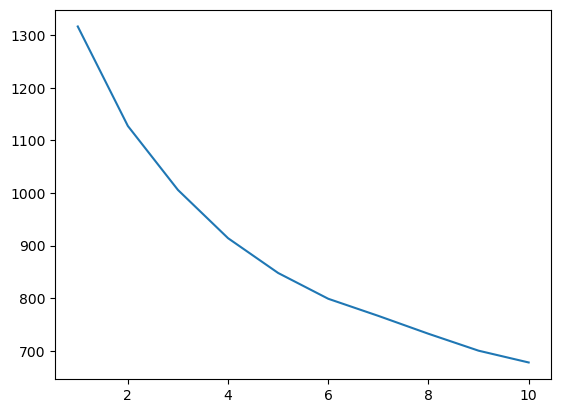

In [14]:
wcss = []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.show()